In [10]:
# Magic Formula Based Trading Strategy
import backtrader as bt
import yfinance as yf
import quantstats as qs
import pandas as pd

In [3]:
class ROIC(bt.Indicator):
    lines = ('roic',)
    params = (('period', 1),)

    def __init__(self):
        self.addminperiod(self.params.period)

    def next(self):
        net_income = self.data.close[0]  # Replace this with the actual Net Income data
        invested_capital = self.data.open[0]  # Replace this with the actual Invested Capital data
        self.lines.roic[0] = net_income / invested_capital


class EarningsYield(bt.Indicator):
    lines = ('earnings_yield',)
    params = (('period', 1),)

    def __init__(self):
        self.addminperiod(self.params.period)

    def next(self):
        earnings = self.data.close[0]  # Replace this with the actual Earnings data
        price = self.data.open[0]  # Replace this with the actual Price data
        self.lines.earnings_yield[0] = earnings / price


class MagicFormula(bt.Strategy):
    def __init__(self):
        self.roic = ROIC(self.data)
        self.earnings_yield = EarningsYield(self.data)

    def next(self):
        if self.roic > 0 and self.earnings_yield > 0:
            self.buy()
        elif self.roic < 0 and self.earnings_yield < 0:
            self.sell()

In [4]:
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [5]:
cerebro = bt.Cerebro()
cerebro.addstrategy(MagicFormula)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='returns')

data_feed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data_feed)
cerebro.broker.set_cash(10000)

In [6]:
initial_value = cerebro.broker.getvalue()
results = cerebro.run()
final_value = cerebro.broker.getvalue()

portfolio_return = (final_value - initial_value) / initial_value
profit = final_value - initial_value

print(f"Portfolio Return: {portfolio_return * 100}%")
print(f"Profit: ${profit}")

Portfolio Return: 75.26050136566163%
Profit: $7526.050136566162


                           Strategy
-------------------------  ----------
Start Period               2020-01-02
End Period                 2020-12-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          75.26%
CAGR﹪                     75.8%

Sharpe                     1.91
Prob. Sharpe Ratio         97.19%
Smart Sharpe               1.68
Sortino                    2.97
Smart Sortino              2.61
Sortino/√2                 2.1
Smart Sortino/√2           1.85
Omega                      1.42

Max Drawdown               -20.37%
Longest DD Days            117
Volatility (ann.)          32.08%
Calmar                     3.72
Skew                       0.1
Kurtosis                   3.87

Expected Daily %           0.22%
Expected Monthly %         4.79%
Expected Yearly %          75.26%
Kelly Criterion            16.33%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.08%
Expected Shortfall (cVaR)  -3.08%

Max Consecutive Wins       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-09-02,2020-09-18,2020-12-28,117,-20.365499,-20.156923
2,2020-02-13,2020-03-23,2020-04-30,77,-10.949074,-10.288556
3,2020-07-21,2020-07-24,2020-07-31,10,-5.834443,-5.600757
4,2020-06-11,2020-06-11,2020-06-22,11,-4.042451,-3.361865
5,2020-08-07,2020-08-11,2020-08-13,6,-3.972563,-2.448025


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


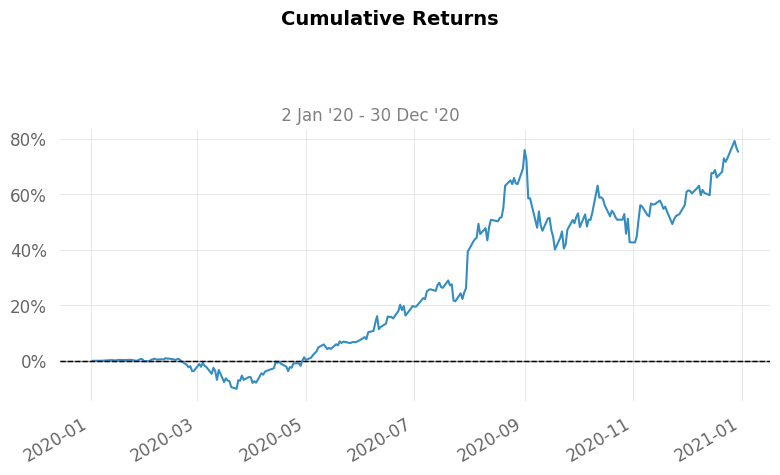

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


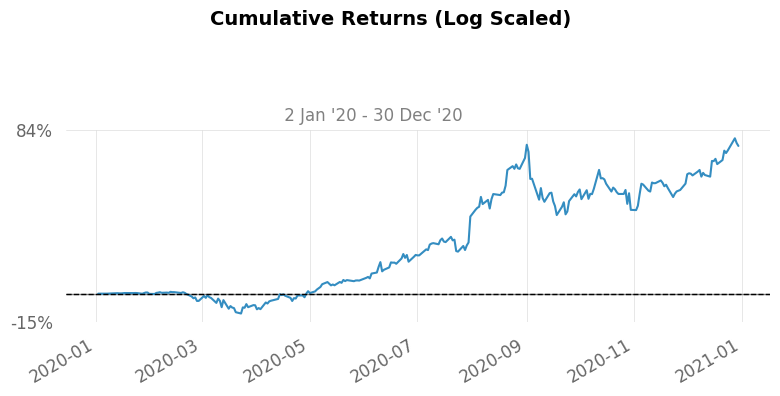

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


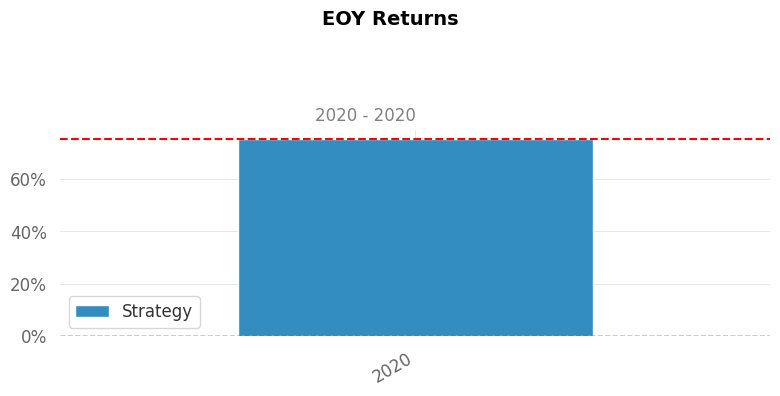

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


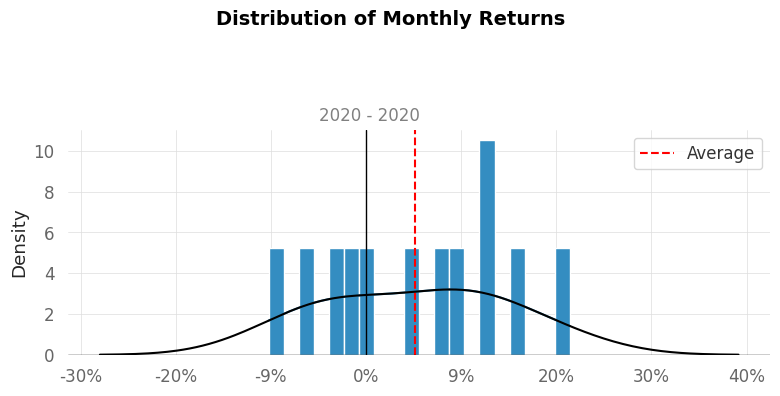

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


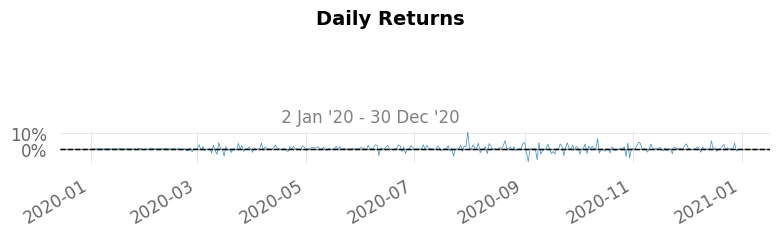

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


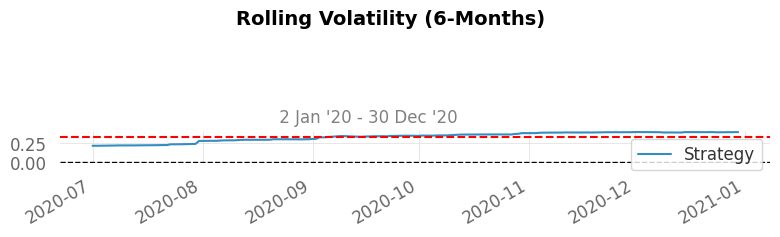

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


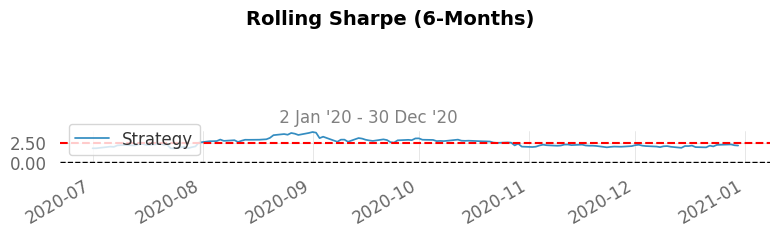

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


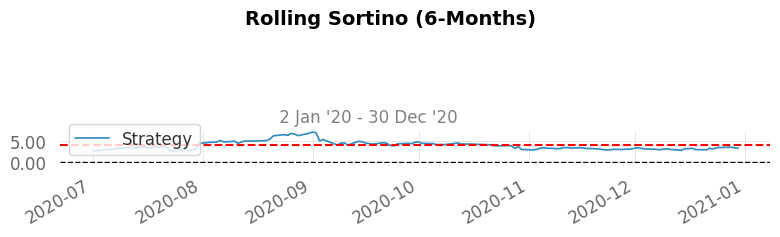

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


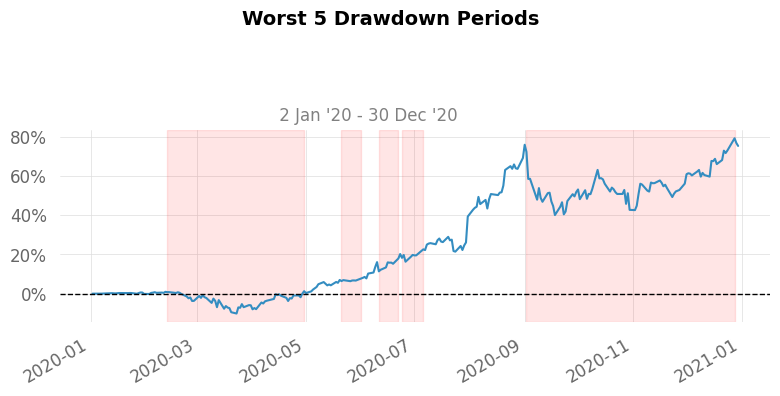

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


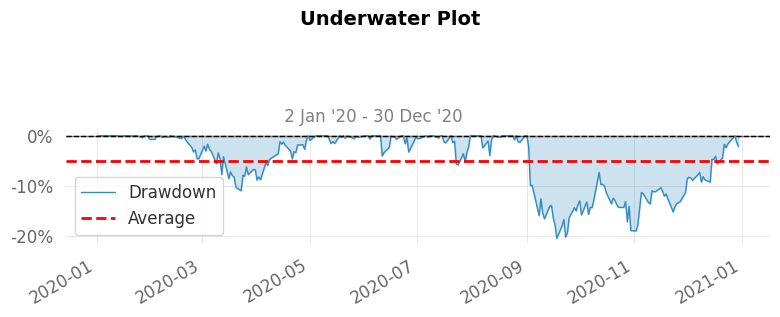

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


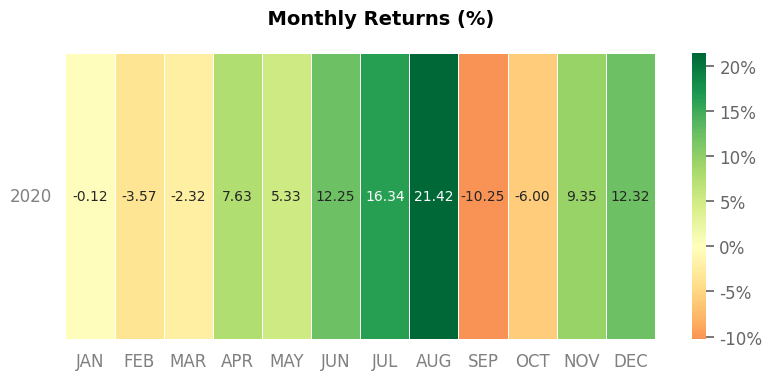

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


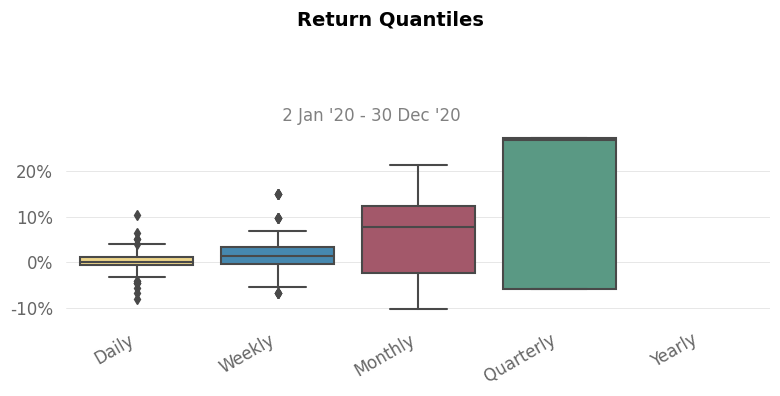

In [11]:
returns = results[0].analyzers.getbyname('returns').get_analysis()
returns_series = pd.Series(returns)
qs.extend_pandas()
qs.reports.full(returns_series)

In [ ]:
cerebro.plot()